In [136]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [137]:
telecom_data = pd.read_csv("C:\\Users\\renuk\\OneDrive\\Documents\\Telecom_Churn_CaseStudy\\telecom_churn_data.csv")
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Extracting the 9th Month columns from the give Dataset

In [138]:
telecom_data_9=telecom_data[telecom_data.columns[telecom_data.columns.str.contains('_9')]]

In [139]:
telecom_data_9.columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

##### These columns will be deleted from the Main Dataset after creating the target variable churn.

In [140]:
telecom_data_9.shape

(99999, 54)

#### Now the 4 variables total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9 will help us to tag to tag the customers as churn or not.

#### If the toatal of the 4 variables is 0 then customer will be tagged as churned otherwise not churned

In [141]:
# Creating the target variable depending upon the total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9 
# Creating a new variable Total usage to get the sum of all the columns.

telecom_data['Total_usage'] = telecom_data['total_ic_mou_9'] + telecom_data['total_og_mou_9'] + telecom_data['vol_2g_mb_9'] + telecom_data['vol_3g_mb_9']


In [142]:
# Creating the variable churn : if the Total_usage = 0 then churn value is 1
telecom_data['churn'] = telecom_data.Total_usage.apply(lambda x:1 if x==0 else 0)

In [143]:
telecom_data[['Total_usage','churn']]

,Total_usage,churn
0,0.00,1
1,260.15,0
2,651.10,0
3,667.92,0
4,309.90,0
...,...,...
99994,181.57,0
99995,215.25,0
99996,0.00,1
99997,4265.02,0


#### Now checking the percentage of churned customers

In [144]:
churn_percentage = (telecom_data.churn.sum())/len(telecom_data)*100

In [145]:
churn_percentage

10.19110191101911

In [128]:
# The churn percentage is very small this means that data is highly imbalanced. We will have to take care of the class imbalance 

In [146]:
# Dropping the columns of 9th month and Toatl usage as these wont be used for predictions
telecom_data.drop(columns=telecom_data_9.columns, inplace=True)
telecom_data.drop('Total_usage',axis=1,inplace=True)

### Now we need to filter the high value customers as they marks for 80% of the revenue and thus being important for the company 

##### High Value Customers - Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [147]:
# High Value customers
telecom_data[telecom_data.columns[telecom_data.columns.str.contains('_rech')]].isnull().sum()/len(telecom_data)*100

total_rech_num_6             0.000000
total_rech_num_7             0.000000
total_rech_num_8             0.000000
total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
date_of_last_rech_6          1.607016
date_of_last_rech_7          1.767018
date_of_last_rech_8          3.622036
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3

In [148]:
# Imputing av_rech_amt_data_6,av_rech_amt_data_7,total_rech_data_6,total_rech_data_7 with 0
a = ['av_rech_amt_data_6','av_rech_amt_data_7','total_rech_data_6','total_rech_data_7']
telecom_data[a]=telecom_data[a].fillna(0)

In [149]:
# For high Value Customres finding - Calculate Total Recharge Amount for June and July 
total_data_rech_amt_6 = telecom_data['total_rech_data_6']*telecom_data['av_rech_amt_data_6']

total_call_rech_amt_6 = telecom_data['total_rech_amt_6']

total_rech_amt_june = total_data_rech_amt_6 + total_call_rech_amt_6

total_data_rech_amt_7 = telecom_data['total_rech_data_7']*telecom_data['av_rech_amt_data_7']

total_call_rech_amt_7 = telecom_data['total_rech_amt_7']

total_rech_amt_july=total_call_rech_amt_7+total_data_rech_amt_7

In [150]:
# Average for June and July 
telecom_data['Avg_rech_amt_6_7'] = (total_rech_amt_june + total_rech_amt_july)/2

In [151]:
# calculating 70th percentile
telecom_data.Avg_rech_amt_6_7.quantile(0.7)

478.0

In [152]:
# Creating the new dataframe of High value customers 
hvc_df = telecom_data[telecom_data.Avg_rech_amt_6_7 >= telecom_data.Avg_rech_amt_6_7.quantile(0.7)]

In [153]:
hvc_df.shape

(30001, 174)

In [154]:
b=hvc_df.columns[hvc_df.nunique()==1]

In [155]:
#Droping the columns having single value
hvc_df= hvc_df.drop(columns=b)

### Missing value treatment 

In [156]:
#checking for null values
m = pd.DataFrame({'column_name':hvc_df.columns,'missing_per' : hvc_df.isnull().sum()*100/len(hvc_df)}).reset_index(drop=True)

In [157]:
hvc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 161 entries, mobile_number to Avg_rech_amt_6_7
dtypes: float64(128), int64(27), object(6)
memory usage: 37.1+ MB


In [158]:
# checking the columns with missing values more than 40%
m.loc[m['missing_per']>40,:]

,column_name,missing_per
106,date_of_last_rech_data_6,44.148528
107,date_of_last_rech_data_7,43.145228
108,date_of_last_rech_data_8,46.825106
111,total_rech_data_8,46.825106
112,max_rech_data_6,44.148528
113,max_rech_data_7,43.145228
114,max_rech_data_8,46.825106
115,count_rech_2g_6,44.148528
116,count_rech_2g_7,43.145228
117,count_rech_2g_8,46.825106


In [159]:
# Checking if int datatype has null rows
hvc_df.loc[:,hvc_df.dtypes=='int64'].isnull().sum()

mobile_number         0
total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
last_day_rch_amt_6    0
last_day_rch_amt_7    0
last_day_rch_amt_8    0
monthly_2g_6          0
monthly_2g_7          0
monthly_2g_8          0
sachet_2g_6           0
sachet_2g_7           0
sachet_2g_8           0
monthly_3g_6          0
monthly_3g_7          0
monthly_3g_8          0
sachet_3g_6           0
sachet_3g_7           0
sachet_3g_8           0
aon                   0
churn                 0
dtype: int64

In [160]:
# Mobile number is of no use in analysis 
hvc_df.drop('mobile_number', axis=1, inplace=True)

In [161]:
# checking for null values in float columns 
hvc_dff_col=hvc_df.loc[:, hvc_df.dtypes=='float64'].columns

# Imputing null values with 0 
[hvc_df[col].fillna(0.0, inplace=True) for col in hvc_dff_col]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [162]:
# The null values is 0 after imputing
hvc_df.loc[:, hvc_df.dtypes=='float64'].isnull().sum().value_counts()

0    128
dtype: int64

In [163]:
#check to see for which columns percentage of missing values is greater than 0
m=pd.DataFrame({'column_name':hvc_df.columns,'missing_per': hvc_df.isnull().sum()*100/len(hvc_df)}).reset_index(drop=True)
m.loc[m['missing_per']>0,:]

,column_name,missing_per
99,date_of_last_rech_6,0.243325
100,date_of_last_rech_7,0.326656
101,date_of_last_rech_8,1.943269
105,date_of_last_rech_data_6,44.148528
106,date_of_last_rech_data_7,43.145228
107,date_of_last_rech_data_8,46.825106


In [164]:
# Date of last recharge for call and data can be imputed with min value pesent in the column
date_columns = hvc_df.select_dtypes(include='object').columns

In [165]:
for col in date_columns:
    x = hvc_df.loc[~hvc_df[col].isna(),col].min()
    hvc_df.loc[hvc_df[col].isna(),col] = x

In [166]:
for col in date_columns:
    hvc_df[col] = pd.to_datetime(hvc_df[col],errors='coerce')

In [167]:
# for calculating week of the month from date columns
for col in date_columns:
    hvc_df[col] = hvc_df[col].apply(lambda d: (d.day-1) // 7 + 1)

In [168]:
# Renaming date columns to week
hvc_df.rename(columns={'date_of_last_rech_6': 'week_of_last_rech_6', 'date_of_last_rech_7': 'week_of_last_rech_7',
                      'date_of_last_rech_8': 'week_of_last_rech_8','date_of_last_rech_data_6':'week_of_last_rech_data_6',
                      'date_of_last_rech_data_7':'week_of_last_rech_data_7',
                       'date_of_last_rech_data_8':'week_of_last_rech_data_8'},inplace=True)

In [169]:
# Check for any null values in the dataset
np.any(np.isnan(hvc_df))

False

In [170]:
# Check for infinity values present if any 
np.any(np.isinf(hvc_df))

False

####  The data is cleaned and we can do the modelling

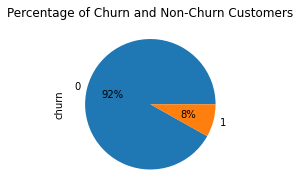

In [171]:
# Analysis of Churn percentage. Creating a pie Chart
fig = plt.figure(figsize=[4,3])
(hvc_df['churn'].value_counts()).plot(kind='pie', autopct='%1.0f%%')
plt.title('Percentage of Churn and Non-Churn Customers')
plt.show()

### For class imbalance SMOTE technique can be used But for large dimensional data its preferable not to use

# Modelling

In [172]:
#splitting target variable and independent variable 
y = hvc_df.pop('churn')
X = hvc_df

In [173]:
# Splitting the data into train and test
X_train , X_test , y_train , y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [174]:
 
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(21000, 159) (21000,) (9001, 159) (9001,)


In [175]:
# Storing the name of predictor columns of X_train for future
X_train_columns=X_train.columns

In [176]:
# Scaling the train dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_train

array([[-0.04741513,  0.16028637, -0.96889117, ...,  1.35421828,
        -0.15156914,  0.22685885],
       [-0.21366042, -0.09097989, -0.18065956, ..., -0.38075646,
        -0.15156914, -0.40400149],
       [-0.4313653 , -0.52725442, -0.43775977, ..., -0.38075646,
        -0.15156914, -0.36665745],
       ...,
       [ 1.10243551,  0.99217844, -0.04765787, ..., -0.38075646,
        -0.15156914,  0.18516405],
       [-0.35740833, -0.18291313,  0.4321179 , ..., -0.38075646,
        -0.15156914, -0.46418701],
       [ 1.97573273,  1.15712811,  0.74458101, ..., -0.38075646,
        -0.15156914,  0.19749121]])

In [177]:
# Scaling test dataset
X_test = scaler.transform(X_test)

###  Reducing the number of variables using PCA

In [178]:
pca = PCA(random_state=42)

In [179]:
pca.fit(X_train)

PCA(random_state=42)

In [180]:
pca.components_

array([[-5.49286968e-02, -5.51160847e-02, -4.48831416e-02, ...,
         1.08511594e-01,  2.67879735e-02,  1.02402887e-01],
       [ 1.58037862e-01,  1.67401450e-01,  1.68672663e-01, ...,
         7.97582458e-02,  2.64754886e-02,  9.80276630e-02],
       [ 9.05619892e-02,  1.11242379e-01,  9.83706239e-02, ...,
         2.94704421e-02,  9.80943946e-03,  1.12129799e-01],
       ...,
       [ 0.00000000e+00, -1.91312304e-16,  1.91851290e-16, ...,
        -1.49096906e-17, -1.30165999e-17,  9.74790760e-18],
       [ 0.00000000e+00,  5.92104766e-17, -3.03932872e-16, ...,
         1.54446444e-17,  1.10834472e-17,  9.99891711e-18],
       [ 0.00000000e+00, -3.61902933e-17,  2.97555612e-17, ...,
         9.67275424e-18,  5.40870213e-18, -1.10316049e-16]])

In [181]:
pca.explained_variance_ratio_

array([1.14094196e-01, 8.90310397e-02, 6.28024183e-02, 5.37377642e-02,
       3.67585210e-02, 3.22642598e-02, 2.70726885e-02, 2.56034316e-02,
       2.31882382e-02, 2.14941840e-02, 2.04705027e-02, 1.97085913e-02,
       1.80052193e-02, 1.76712369e-02, 1.70239680e-02, 1.65842813e-02,
       1.53824761e-02, 1.42611573e-02, 1.37990692e-02, 1.33798648e-02,
       1.24160280e-02, 1.13819811e-02, 1.12399993e-02, 1.05087534e-02,
       1.01478122e-02, 9.78749414e-03, 9.13143491e-03, 8.90563604e-03,
       8.62288506e-03, 7.88377994e-03, 7.57943966e-03, 7.21990708e-03,
       7.13673610e-03, 7.01947319e-03, 6.64151644e-03, 6.41039726e-03,
       6.20744860e-03, 5.98563546e-03, 5.92811460e-03, 5.82003976e-03,
       5.65437461e-03, 5.51037001e-03, 5.36409657e-03, 5.28186772e-03,
       5.11221582e-03, 5.01509627e-03, 4.95183080e-03, 4.53109743e-03,
       4.39057443e-03, 4.34024019e-03, 4.31927989e-03, 4.11265488e-03,
       4.03268992e-03, 3.99784021e-03, 3.89410674e-03, 3.84556428e-03,
      

In [182]:
# Cummulative Vaiance
var_cumsum = np.cumsum(pca.explained_variance_ratio_)
var_cumsum

array([0.1140942 , 0.20312524, 0.26592765, 0.31966542, 0.35642394,
       0.3886882 , 0.41576089, 0.44136432, 0.46455256, 0.48604674,
       0.50651724, 0.52622583, 0.54423105, 0.56190229, 0.57892626,
       0.59551054, 0.61089302, 0.62515417, 0.63895324, 0.65233311,
       0.66474914, 0.67613112, 0.68737112, 0.69787987, 0.70802768,
       0.71781518, 0.72694661, 0.73585225, 0.74447513, 0.75235891,
       0.75993835, 0.76715826, 0.77429499, 0.78131447, 0.78795598,
       0.79436638, 0.80057383, 0.80655947, 0.81248758, 0.81830762,
       0.82396199, 0.82947236, 0.83483646, 0.84011833, 0.84523054,
       0.85024564, 0.85519747, 0.85972857, 0.86411914, 0.86845938,
       0.87277866, 0.87689132, 0.88092401, 0.88492185, 0.88881596,
       0.89266152, 0.89634679, 0.89989463, 0.90330447, 0.90663096,
       0.90988501, 0.91294837, 0.91585298, 0.91871444, 0.92153418,
       0.9241846 , 0.92680124, 0.92937908, 0.93193721, 0.93446106,
       0.93683375, 0.93919803, 0.94151469, 0.94376343, 0.94599

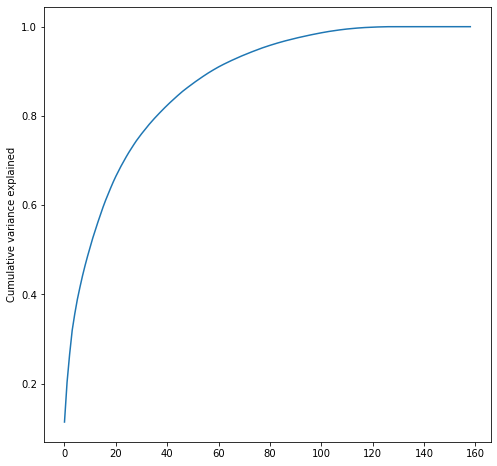

In [183]:
fig = plt.figure(figsize=[8,8])
plt.plot(var_cumsum)
plt.ylabel("Cumulative variance explained")
plt.show()

In [184]:
# PCA with 80 components
pca_final = IncrementalPCA(n_components=80)

In [185]:
X_train_pca = pca_final.fit_transform(X_train)

In [186]:
X_train_pca.shape

(21000, 80)

In [187]:
corr = np.corrcoef(X_train_pca.transpose())

In [188]:
corr.shape

(80, 80)

In [189]:
# Transformation on test dataset
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 80)

### Logistic Regression Model with PCA

In [190]:
learner_pca = LogisticRegression(class_weight="balanced")

In [191]:
#fitting the model
model_pca = learner_pca.fit(X_train_pca, y_train)

In [192]:
pred_probs_train = model_pca.predict_proba(X_train_pca)

In [193]:
pred_probs_train

array([[0.13575881, 0.86424119],
       [0.37463091, 0.62536909],
       [0.94657344, 0.05342656],
       ...,
       [0.79753635, 0.20246365],
       [0.91721584, 0.08278416],
       [0.9718674 , 0.0281326 ]])

In [194]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':pred_probs_train[:, 1].tolist()})

In [195]:
y_train_pred_final

,Churn,Churn_Prob
0,1,0.864241
1,0,0.625369
2,0,0.053427
3,0,0.478402
4,0,0.112306
...,...,...
20995,1,0.968252
20996,0,0.128349
20997,1,0.202464
20998,0,0.082784


In [196]:
threshold = 0.5

In [197]:
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > threshold else 0)

In [198]:
y_train_pred_final

,Churn,Churn_Prob,Predicted
0,1,0.864241,1
1,0,0.625369,1
2,0,0.053427,0
3,0,0.478402,0
4,0,0.112306,0
...,...,...,...
20995,1,0.968252,1
20996,0,0.128349,0
20997,1,0.202464,0
20998,0,0.082784,0


In [199]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)

In [200]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [201]:
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.8482758620689655
Accuracy   : 0.8308095238095238


#### High Sensitivity means there are few false negatives thus fewer cases of churn would be missed. Hence,sensitivity is required as much as possible. Hence, threshold=0.5 looks ok.

In [202]:
# Test set prediction
pred_probs_test = model_pca.predict_proba(X_test_pca)

In [203]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':pred_probs_test[:, 1].tolist()})

In [204]:
y_test_pred_final['Predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > threshold else 0)

In [205]:
y_test_pred_final.shape

(9001, 3)

In [206]:
# Confusion matrix for test dataset
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.8145506419400856
Accuracy   : 0.8221308743472947


### Decision Tree Model with PCA variables

In [207]:
tree = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf = 5, class_weight="balanced")

In [208]:
tree.fit(X_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [209]:
y_train_pred = tree.predict(X_train_pca)

In [210]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Predicted':y_train_pred})

In [211]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.8040229885057472
Accuracy   : 0.7774761904761904


### HyperParameter Tunning

In [212]:
dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")

In [213]:
params = {
    'max_depth': [5, 10, 20, 50],
    'min_samples_leaf': [10, 20, 50, 100]
}

In [214]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [215]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
Wall time: 30.3 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 50],
                         'min_samples_leaf': [10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [216]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=100, random_state=42)

In [217]:
y_train_pred = grid_search.best_estimator_.predict(X_train_pca)

In [218]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Predicted':y_train_pred})

In [219]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.8695402298850575
Accuracy   : 0.7842857142857143


In [220]:
y_test_pred = grid_search.best_estimator_.predict(X_test_pca)

In [221]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Predicted':y_test_pred})

In [222]:
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.7617689015691869
Accuracy   : 0.7548050216642596


### Random Forest

In [223]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")

In [224]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 5, 10],
    'min_samples_leaf': [50, 100, 200],
    'max_features': [8, 10],
    'n_estimators': [50, 100, 200]
}

In [225]:
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [226]:
%%time
grid_search.fit(X_train_pca,y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits
Wall time: 8min 47s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'max_features': [8, 10],
                         'min_samples_leaf': [50, 100, 200],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=1)

In [227]:
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=8,
                       min_samples_leaf=50, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [228]:
# Train set prediction
y_train_pred = grid_search.best_estimator_.predict(X_train_pca)

In [229]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Predicted':y_train_pred})

In [230]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.7839080459770115
Accuracy   : 0.8172857142857143


In [231]:
# Test set prediction
y_test_pred = grid_search.best_estimator_.predict(X_test_pca)

In [232]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Predicted':y_test_pred})

In [233]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.7731811697574893
Accuracy   : 0.8100211087656927


#### Random Forest is giving a good model 

### Random Forest without PCA

In [235]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 5, 10],
    'min_samples_leaf': [50, 100, 200],
    'max_features': [8, 10],
    'n_estimators': [50, 100, 200]
}

In [236]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [237]:
%%time
grid_search.fit(X_train,y_train)



Fitting 4 folds for each of 54 candidates, totalling 216 fits
Wall time: 4min 41s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'max_features': [8, 10],
                         'min_samples_leaf': [50, 100, 200],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=1)

In [238]:
rf_best=grid_search.best_estimator_

In [239]:
#### Train set prediction :: RF

y_train_pred = rf_best.predict(X_train)

y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Predicted':y_train_pred})

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.8126436781609195
Accuracy   : 0.8928095238095238


In [240]:
#### Test set prediction :: RF

y_test_pred = rf_best.predict(X_test)

y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Predicted':y_test_pred})

# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.7888730385164051
Accuracy   : 0.8821242084212865


In [241]:
grid_search.best_estimator_.feature_importances_

array([1.15104063e-03, 2.65288654e-03, 4.49816411e-02, 1.30056011e-03,
       1.29630157e-03, 1.92609292e-02, 1.43867423e-03, 1.08153655e-03,
       1.40735647e-02, 3.85972175e-04, 1.18163243e-03, 2.40274115e-02,
       2.18755540e-04, 9.56528218e-04, 2.64999542e-02, 1.08285121e-03,
       1.05325834e-03, 4.11351940e-02, 2.29440752e-03, 2.65489920e-03,
       5.78355690e-02, 6.15971173e-04, 2.01255923e-03, 1.01136287e-02,
       1.59378514e-05, 9.75483448e-05, 5.21607536e-05, 7.23294625e-04,
       1.78973492e-03, 2.51406655e-02, 2.55261068e-03, 2.22338411e-03,
       1.28332400e-03, 8.43554977e-04, 1.64747408e-03, 2.96516069e-03,
       3.79475940e-07, 8.23975819e-06, 4.10090527e-05, 3.79270606e-03,
       4.86589280e-03, 6.86751401e-03, 8.65587246e-05, 1.28656640e-05,
       1.24449636e-04, 2.47155214e-04, 8.40155793e-04, 9.11976328e-04,
       1.07140251e-04, 0.00000000e+00, 0.00000000e+00, 1.62689047e-03,
       3.15266922e-03, 2.50326498e-02, 1.39167572e-03, 1.53203309e-03,
      

In [242]:
imp_hvc_df = pd.DataFrame({
    "Varname": X_train_columns,
    "Imp": grid_search.best_estimator_.feature_importances_
})

In [243]:
imp_hvc_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
65,loc_ic_mou_8,0.095269
80,total_ic_mou_8,0.067889
20,loc_og_t2m_mou_8,0.057836
2,arpu_8,0.044982
56,loc_ic_t2t_mou_8,0.044194
...,...,...
49,og_others_7,0.000000
136,night_pck_user_7,0.000000
50,og_others_8,0.000000
135,night_pck_user_6,0.000000


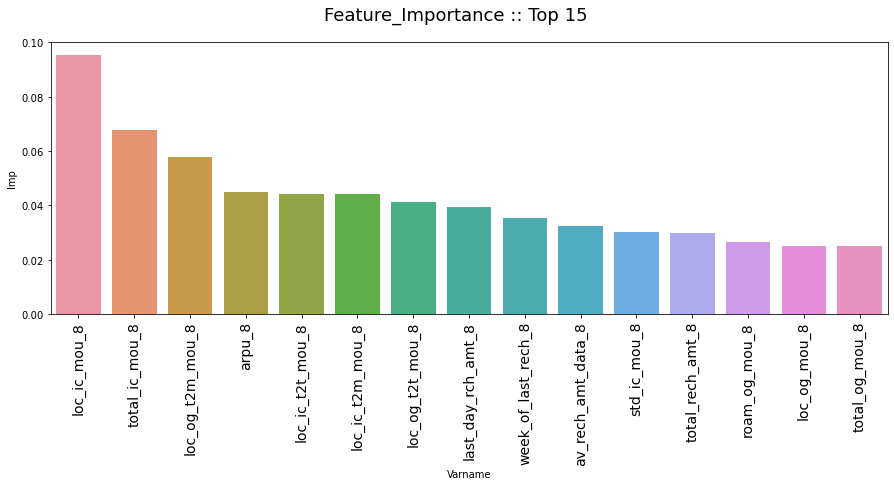

In [244]:
plt.figure(figsize=[15,5])
sns.barplot(x='Varname', y='Imp', data=imp_hvc_df.sort_values(by="Imp", ascending=False).head(15))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90, fontsize=14)
plt.suptitle('Feature_Importance :: Top 15', fontsize=18)
plt.show()

#### Business Recommendations
##### The customers who are predicted to be churned can be faciliated with more offers on local and total incoming minutes of usuage
##### Run discount campaigns on certain weeks of month for data + incoming and outgoing calls
##### Within the same operator local incoming and outgoing minutes of usuage should be offered more deals